In [56]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import seaborn as sns

# 실제 데이터가 어떻게 이루어져 있는지 시각화
# train-test loss 시각화

In [54]:
data_dic = {'label' : ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']}

pd.set_option("display.max_rows", None)
data = pd.read_csv("./dataset/auto-mpg.data", sep="\s+", names=data_dic["label"], na_values="?")
# \s+ : 한 개 이상의 공백으로 나누어진 데이터를 처리.
df = pd.DataFrame(data)

print(df.shape)
df = df.dropna()
df.head(5)

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [81]:
df = pd.get_dummies(df).astype(float)

df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name_amc ambassador brougham,car name_amc ambassador dpl,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(262, 308) (262, 1)


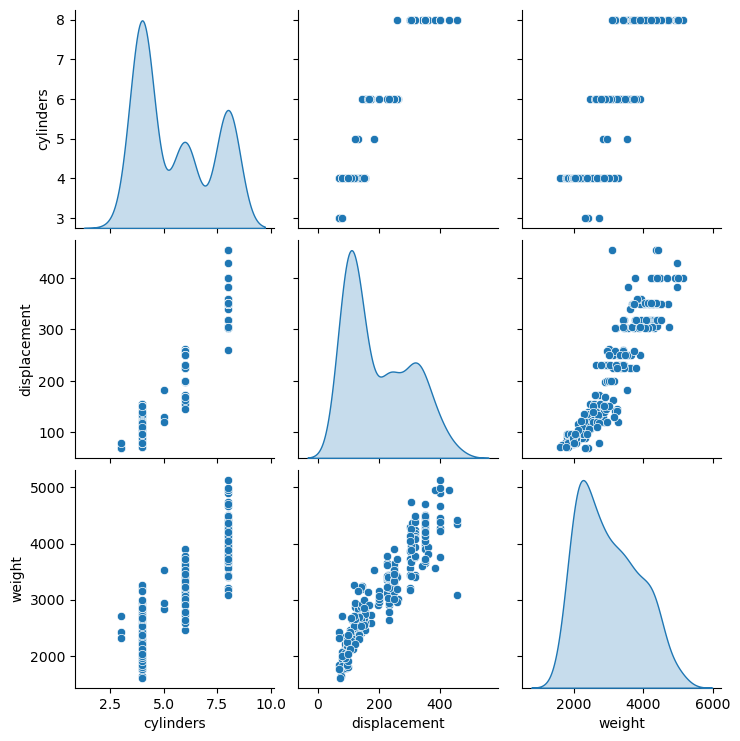

In [82]:
y = df.iloc[:, 0:1]
X = df.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sns.pairplot(X_train[["cylinders", "displacement", "weight"]], diag_kind="kde")
print(X_train.shape, y_train.shape)

In [87]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(308, )),
    Dense(64, activation='relu'),
    Dense(1)
  ])

model.compile(loss='mse', optimizer='adam')

model.summary()

result = model.fit(X_train, y_train, validation_split=0.33, epochs=1000, verbose=1)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 64)                19776     
                                                                 
 dense_68 (Dense)            (None, 64)                4160      
                                                                 
 dense_69 (Dense)            (None, 1)                 65        
                                                                 
Total params: 24,001
Trainable params: 24,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
6/6 [==============================] - 1s 27ms/step - loss: 627.7068 - val_loss: 599.4406
Epoch 2/1000
6/6 [==============================] - 0s 5ms/step - loss: 329.0865 - val_loss: 226.0118
Epoch 3/1000
6/6 [==============================] - 0s 5ms/step - loss: 255.3852 - val_loss: 209.5249
Epoch 

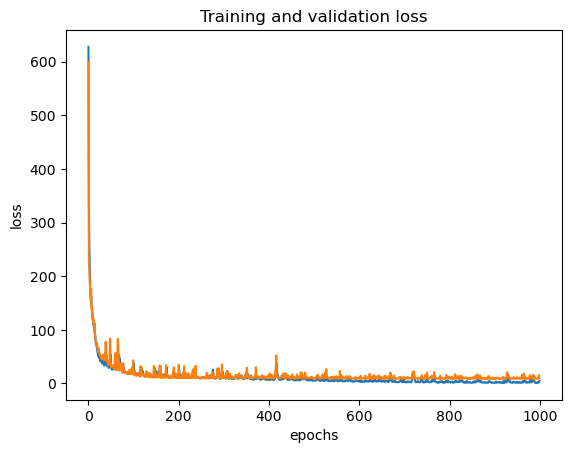

In [88]:
result.history.keys()
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
x = np.arange(0, 100)
plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])

5/5 [==============================] - 0s 809us/step


Text(0, 0.5, 'Count')

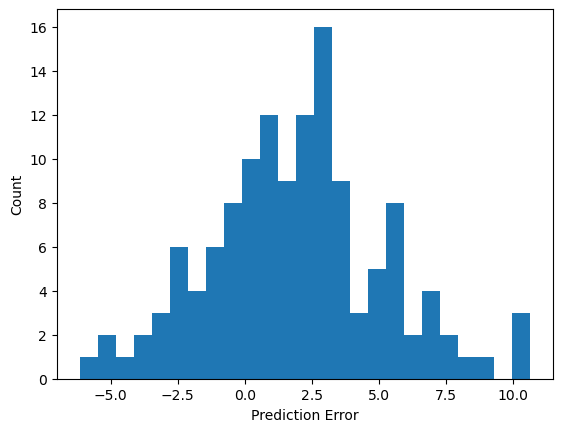

In [97]:
test_pred = model.predict(X_test)
error = test_pred - y_test
plt.hist(error, bins=25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")